Load data from Yahoo finance - Amazon, Tesla and Zoom

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

list = ["AMZN", "TSLA", "ZM"]
df = pd.DataFrame()

for t in list:
    df[t] = wb.DataReader(t, data_source = "yahoo", start = "2020-01-01", end = "2020-12-31")["Adj Close"]
    
print(df.head())
print(df.tail())

                   AMZN       TSLA         ZM
Date                                         
2020-01-02  1898.010010  86.052002  68.720001
2020-01-03  1874.969971  88.601997  67.279999
2020-01-06  1902.880005  90.307999  70.320000
2020-01-07  1906.859985  93.811996  71.900002
2020-01-08  1891.969971  98.428001  72.550003
                   AMZN        TSLA          ZM
Date                                           
2020-12-24  3172.689941  661.770020  375.170013
2020-12-28  3283.959961  663.690002  351.390015
2020-12-29  3322.000000  665.989990  353.750000
2020-12-30  3285.850098  694.780029  353.399994
2020-12-31  3256.929932  705.669983  337.320007


Calculate the annualised average returns of the individual assets

In [2]:
df_return = np.log(df / df.shift(1))
df_return_a = df_return.mean() * 250

df_return_a

AMZN    0.535693
TSLA    2.087496
ZM      1.578365
dtype: float64

Calculate the annualised average risk of the individual assets

In [3]:
risk_a = df_return.std() * 250 ** 0.5
risk_a

AMZN    0.382598
TSLA    0.893170
ZM      0.824614
dtype: float64

Need to consider 3 randomised weights - one for each stock

In [4]:
num = len(list)

weights = np.random.random(len(list))
weights /= np.sum(weights)
print(weights)
print(np.sum(weights))

[0.69002906 0.11340527 0.19656567]
1.0


Calculate the Portfolio Return

In [5]:
pfolio_return_a = weights[0] * df_return_a["AMZN"] + weights[1] * df_return_a["TSLA"] + weights[2] * df_return_a["ZM"]

pfolio_return_a

0.9166294528734753

Calculate Portfolio Risk

In [6]:
pfolio_var = np.dot(weights.T, np.dot((df_return.cov() * 250), weights))

pfolio_risk = pfolio_var ** 0.5

pfolio_risk

0.3982682154505033

----------------------------------------------------------------------------------------------------

We now need to consider portfolios with different weights to draft the EF graph

In [7]:
pfolio_return = []
pfolio_risk = []

for i in range (1000):
    weights = np.random.random(len(list))
    weights /= np.sum(weights)
    
    pfolio_return.append(np.sum(weights * df_return.mean() * 250))
    pfolio_risk.append(np.dot(weights.T, np.dot(df_return.cov() * 250, weights) ** 0.5))
    
print(pfolio_return)
print(pfolio_risk)

[1.4069880467228049, 1.7058009445312217, 1.4402107854738064, 1.6375197608062622, 1.5568100624574992, 1.3097837404662118, 1.387146809970146, 1.0267500537142888, 1.517578603032188, 1.5191501935437604, 0.8303967923289188, 1.3898531884166907, 1.383969541124888, 1.0617067373097973, 1.2089544049078558, 1.3239108950019176, 1.034619258562271, 1.6439565251407622, 0.9743859543588012, 1.1548873706686908, 1.492895284739516, 1.3599868254803797, 1.2660403737352675, 1.3577252897548013, 1.6701828721240823, 1.7506126193993115, 1.643454042800445, 1.5678720555795966, 1.2441311750005322, 1.4084526030350806, 0.6595377499965813, 1.6915662369282098, 1.4358649376672386, 1.1786554072123239, 1.4602129298637232, 1.7856200057458578, 1.964685530908013, 1.52220800548158, 1.619450772026017, 1.0513934559930238, 1.4096735451473834, 1.1351893633832348, 1.4172243555169897, 1.5140885652920661, 1.6709221180589213, 1.2413507027230377, 1.0248810105806794, 1.2918388254604318, 1.1689636762937565, 1.4375391344500679, 1.4941619

Now convert the two list into numpy arrays

In [8]:
pfolio_return = np.array(pfolio_return)
pfolio_risk = np.array(pfolio_risk)

print(pfolio_return)
print(pfolio_risk)

[1.40698805 1.70580094 1.44021079 1.63751976 1.55681006 1.30978374
 1.38714681 1.02675005 1.5175786  1.51915019 0.83039679 1.38985319
 1.38396954 1.06170674 1.2089544  1.3239109  1.03461926 1.64395653
 0.97438595 1.15488737 1.49289528 1.35998683 1.26604037 1.35772529
 1.67018287 1.75061262 1.64345404 1.56787206 1.24413118 1.4084526
 0.65953775 1.69156624 1.43586494 1.17865541 1.46021293 1.78562001
 1.96468553 1.52220801 1.61945077 1.05139346 1.40967355 1.13518936
 1.41722436 1.51408857 1.67092212 1.2413507  1.02488101 1.29183883
 1.16896368 1.43753913 1.49416199 1.70792759 1.73120956 1.50462565
 1.55808516 1.30651406 1.32504704 1.27750125 0.99565573 0.81716514
 1.33640608 1.31523681 1.45246548 1.38497019 1.21187657 1.80339494
 1.33135247 1.41983191 1.19003785 1.29445985 1.3643135  1.65817297
 1.46611716 1.6003261  1.09172444 1.38978214 1.17622534 1.49737329
 1.43599673 1.29073012 1.58435119 1.53817588 1.55394699 1.26826594
 1.25290531 1.40878938 1.73427991 1.2521478  1.59049409 1.72721

In [9]:
pfolio_df = pd.DataFrame({"Return": pfolio_return, "Volatility": pfolio_risk})

pfolio_df

,Return,Volatility
0,1.406988,0.520287
1,1.705801,0.661601
2,1.440211,0.553791
3,1.637520,0.721834
4,1.556810,0.552564
...,...,...
995,1.571957,0.603672
996,1.572843,0.652179
997,1.197494,0.465168
998,1.406343,0.506827


Plot the Efficient Frontier

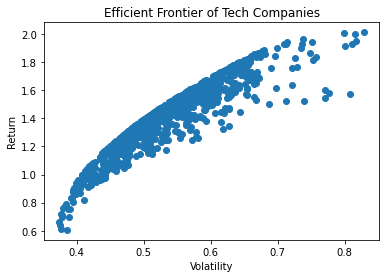

In [12]:
plt.scatter(x = pfolio_df["Volatility"], y = pfolio_df["Return"])
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient Frontier of Tech Companies")

plt.savefig("F:/Data Science practice/Blog/Efficient Frontier/Tech Company Efficient Frontier Graph.png")
plt.show()